# Random Forest Classifier carbon, silicon, and nitrogen isotopes
## Includes feature importances and confusion matrix test

In [24]:
#Imports
import joblib
import pandas as pd

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [25]:
# Read csv file
C_Si_N = pd.read_csv('presolargrains_C_Si_N.csv')
C_Si_N.head()

,Type,carbon_12_13,nitrogen_14_15,silicon_29_28,silicon_30_28
0,X,74.30,207.4,-685.0,-520.0
1,X,1581.00,116.0,-684.0,-490.0
2,X,234.75,187.2,-683.0,-501.0
3,X,455.00,140.0,-662.0,-770.0
4,X,823.00,44.0,-658.0,-234.0


In [26]:
df = pd.DataFrame(C_Si_N) 
features = (df['carbon_12_13'], df['nitrogen_14_15'], df['silicon_29_28'], df['silicon_30_28'])
#features
feature_names = ('carbon_12_13', 'nitrogen_14_15', 'silicon_29_28', 'silicon_30_28')
feature_names

('carbon_12_13', 'nitrogen_14_15', 'silicon_29_28', 'silicon_30_28')

In [27]:
# Set up data and feature names; display dataframe dropping columns
data = C_Si_N.drop("Type", axis=1)
feature_names2 = data.columns
data.head()

,carbon_12_13,nitrogen_14_15,silicon_29_28,silicon_30_28
0,74.30,207.4,-685.0,-520.0
1,1581.00,116.0,-684.0,-490.0
2,234.75,187.2,-683.0,-501.0
3,455.00,140.0,-662.0,-770.0
4,823.00,44.0,-658.0,-234.0


In [48]:
target = C_Si_N['Type']
target_names = ['AB', 'C', 'M', 'N', 'X', 'Y', 'Z']

In [29]:
# Separate data into train and test buckets
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1, stratify=target)

## Scale the data using MinMaxScalar

In [30]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Train the model; run the test score

In [31]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)
rf.score(X_test_scaled, y_test)

0.9693251533742331

In [43]:
# Save fitted model to file
#filename = 'RandomForestCls_C_Si_N.sav'
#joblib.dump(rf, filename)

## Summary:

### Random Forest Classifier carbon, silicon, and nitrogen:  96.9%

Feature Importance:
Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature.

Code from: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [12]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt


importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(4):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(4), importances[indices],
       color="r", align="center")
plt.xticks(range(4), indices)
plt.xlim([-1, 4])
plt.show()

Automatically created module for IPython interactive environment
Feature ranking:
1. feature 0 (0.476237)
2. feature 3 (0.239102)
3. feature 2 (0.159831)
4. feature 1 (0.124830)


<Figure size 640x480 with 1 Axes>

In [13]:
print(features[0]) # confirms feature 0 is carbon

0         74.30
1       1581.00
2        234.75
3        455.00
4        823.00
5        140.00
6        199.30
7        136.70
8        145.16
9        223.00
10       169.60
11      1693.89
12      2807.00
13      9455.10
14       216.59
15      2377.19
16       148.00
17       578.92
18      1848.00
19      1234.00
20       121.10
21      3101.02
22       378.00
23         6.48
24      1510.10
25      1621.00
26       552.00
27        95.00
28       304.00
29      1272.00
         ...   
1271      43.79
1272      46.10
1273      42.69
1274      40.48
1275      41.63
1276      41.10
1277      41.30
1278      27.40
1279      42.20
1280      42.00
1281       8.68
1282      39.28
1283      27.70
1284      26.76
1285      51.00
1286       7.80
1287      42.66
1288       7.37
1289     148.30
1290       7.74
1291      42.78
1292       4.40
1293      42.23
1294      74.17
1295     108.93
1296     233.00
1297     192.03
1298     386.61
1299    3290.10
1300     844.00
Name: carbon_12_13, Leng

In [14]:
print(features[1]) # confirms feature 1 is nitrogen

0        207.40
1        116.00
2        187.20
3        140.00
4         44.00
5         97.00
6         68.40
7        116.30
8        128.50
9        102.00
10       154.00
11        63.20
12        83.00
13        28.00
14       111.72
15        18.50
16       271.00
17       148.16
18         6.90
19        21.00
20       103.00
21        28.20
22        54.00
23        15.77
24        45.30
25        13.00
26        58.00
27        52.00
28       106.00
29        96.50
         ...   
1271    2151.00
1272    3367.00
1273    1053.00
1274     756.00
1275    2109.00
1276    2833.00
1277    3597.00
1278    1502.00
1279     675.00
1280    2068.00
1281    1300.00
1282    2049.00
1283    4902.00
1284     971.00
1285     387.00
1286    1293.00
1287    1322.00
1288    1696.55
1289     220.00
1290     446.00
1291     684.00
1292     305.00
1293     231.71
1294     332.61
1295     147.00
1296     120.00
1297      58.40
1298      43.00
1299      31.50
1300     213.00
Name: nitrogen_14_15, Le

In [15]:
print(features[2]) # confirms feature 2 is silicon_29_28

0       -685.00
1       -684.00
2       -683.00
3       -662.00
4       -658.00
5       -653.00
6       -610.00
7       -606.00
8       -601.00
9       -600.00
10      -598.00
11      -588.00
12      -578.00
13      -569.00
14      -556.53
15      -555.00
16      -552.00
17      -551.00
18      -540.00
19      -534.00
20      -531.00
21      -521.00
22      -521.00
23      -489.00
24      -480.00
25      -476.00
26      -473.30
27      -469.00
28      -459.00
29      -456.00
         ...   
1271     160.00
1272     162.30
1273     164.00
1274     165.00
1275     165.00
1276     166.90
1277     168.30
1278     169.80
1279     170.90
1280     171.00
1281     174.00
1282     174.00
1283     175.50
1284     179.00
1285     187.00
1286     188.60
1287     190.00
1288     192.32
1289     200.00
1290     201.00
1291     203.00
1292     380.00
1293     422.00
1294     577.00
1295    1082.00
1296    1280.00
1297    1345.00
1298    1362.00
1299    1608.00
1300    2677.00
Name: silicon_29_28, Len

In [18]:
from sklearn.metrics import accuracy_score
predicted = rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predicted)

In [32]:
print(X_test_scaled.shape)

(326, 4)


In [37]:
y_test=y_test.values.reshape(-1,1)
print(y_test.shape)

(326, 1)


In [42]:

print(predicted.shape)

(326,)


In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = pd.DataFrame(confusion_matrix(y_test, predicted), columns=target_names, index=target_names)
cm


,AB,C,M,N,X,Y,Z
AB,6,0,27,0,14,5,1
C,0,0,1,0,0,0,0
M,27,0,110,0,35,10,4
N,0,0,0,0,2,0,0
X,7,0,36,2,11,2,1
Y,4,1,4,0,3,1,2
Z,0,0,7,0,3,0,0


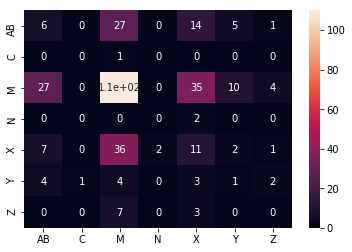

In [54]:
sns.heatmap(cm, annot=True)